In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
alldf = pd.read_csv('./data/전체_입구명_출구명_제거.csv')

In [3]:
alldf['진출시각'].value_counts()

수동출차                   6130
중복입차                   1310
주차중                     376
2017-10-09 19:07:30       3
2019-06-15 18:32:38       3
                       ... 
2017-05-27 13:10:40       1
2017-03-02 19:13:21       1
2017-08-09 11:54:01       1
2017-06-07 18:02:38       1
2019-04-27 20:07:11       1
Name: 진출시각, Length: 1154341, dtype: int64

In [4]:
alldf = alldf[~alldf['진출시각'].isin(['수동출차', '중복입차', '주차중'])]
alldf

,고객구분,연도,주차시간(분),진입시각,진출시각,차종
0,정기권,2017,9682,2017-01-01 00:00:47,2017-01-07 17:21:59,소형
1,정기권,2017,1057,2017-01-01 00:02:54,2017-01-01 17:39:08,소형
2,일반,2017,1245,2017-01-01 00:05:14,2017-01-01 20:49:35,소형
3,정기권,2017,864,2017-01-01 00:09:14,2017-01-01 14:32:37,소형
4,일반,2017,494,2017-01-01 00:25:43,2017-01-01 08:41:00,소형
...,...,...,...,...,...,...
1180047,일반,2019,3,2019-10-24 10:15:13,2019-10-24 10:17:55,소형
1180062,일반,2019,11,2019-10-24 10:19:42,2019-10-24 10:30:40,소형
1180081,일반,2019,10,2019-10-24 10:25:19,2019-10-24 10:35:09,소형
1180089,일반,2019,5,2019-10-24 10:27:33,2019-10-24 10:32:30,소형


# distplot

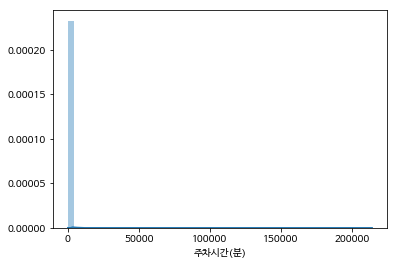

In [5]:
sns.distplot(alldf['주차시간(분)'])

## 주차시간 < 780분

In [6]:
alldf_780 = alldf[alldf['주차시간(분)'] < 780]

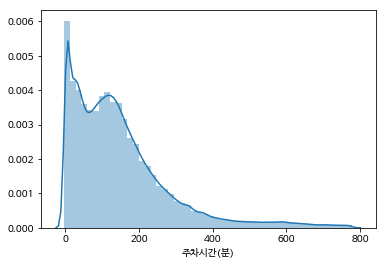

In [7]:
sns.distplot(alldf_780['주차시간(분)'])

## 주차시간 < 200분

In [8]:
alldf_200 = alldf[alldf['주차시간(분)'] < 200]

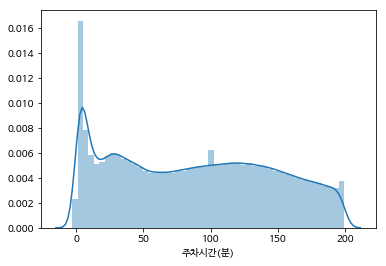

In [9]:
sns.distplot(alldf_200['주차시간(분)'])

## 80분 < 주차시간 < 200분

In [17]:
alldf_80_200 = alldf[(alldf['주차시간(분)'] < 200) & (alldf['주차시간(분)'] > 80)]

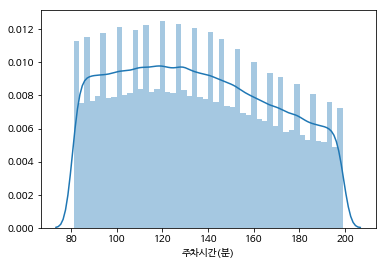

In [18]:
sns.distplot(alldf_80_200['주차시간(분)'])

## 주차시간 < 60분

In [10]:
alldf_60 = alldf[alldf['주차시간(분)'] < 60]

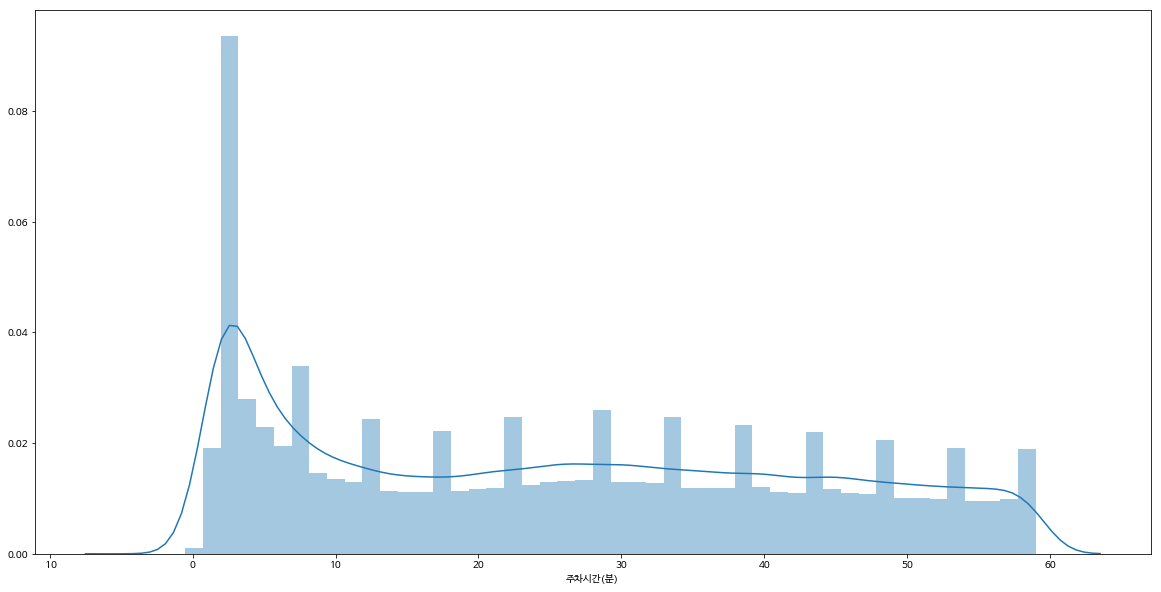

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(alldf_60['주차시간(분)'])

* 첫번째 봉우리: 15분 이하 -> 주차장 자리를 찾지 못하고 나간 사람들
* 두번째 봉우리: 60분 이하 -> 비교적 일찍 나간 사람들
* 60분 이상: 일반유저

In [19]:
alldf.describe()

,연도,주차시간(분)
count,1.172301e+06,1.172301e+06
mean,2.017888e+03,2.025276e+02
std,9.790314e-01,8.126107e+02
min,2.017000e+03,-3.000000e+00
25%,2.017000e+03,5.200000e+01
50%,2.017000e+03,1.240000e+02
75%,2.019000e+03,2.090000e+02
max,2.019000e+03,2.144450e+05


## 주차시간 < 15분 인 차량 수

In [26]:
alldf_15 = alldf[alldf['주차시간(분)'] <= 15]

In [27]:
alldf_15.count(0)

고객구분       121593
연도         121593
주차시간(분)    121593
진입시각       121593
진출시각       121593
차종         121593
dtype: int64

## 주차시간 >= 780분 인 차량수

In [24]:
alldf_780 = alldf[alldf['주차시간(분)'] >=780]

In [25]:
alldf_780.count()

고객구분       27074
연도         27074
주차시간(분)    27074
진입시각       27074
진출시각       27074
차종         27074
dtype: int64

In [23]:
alldf.count()

고객구분       1172301
연도         1172301
주차시간(분)    1172301
진입시각       1172301
진출시각       1172301
차종         1172301
dtype: int64

## 15 < 주차시간 < 780

In [28]:
alldf_15_780 = alldf[(alldf['주차시간(분)'] > 15) & (alldf['주차시간(분)'] < 780)]

In [29]:
alldf_15_780.head()

,고객구분,연도,주차시간(분),진입시각,진출시각,차종
4,일반,2017,494,2017-01-01 00:25:43,2017-01-01 08:41:00,소형
6,일반,2017,629,2017-01-01 00:43:03,2017-01-01 11:11:41,소형
7,정기권,2017,295,2017-01-01 00:46:22,2017-01-01 05:41:13,소형
9,일반,2017,470,2017-01-01 00:50:25,2017-01-01 08:41:05,소형
11,일반,2017,274,2017-01-01 01:02:22,2017-01-01 05:36:07,소형


In [31]:
alldf_15_780.to_csv('./data/전체_주차시간기준_전처리.csv',index=False)